<a href="https://colab.research.google.com/github/roshan337-ass/roshan337-ass/blob/main/Amazon_product_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import string
import inspect
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve, accuracy_score, classification_report

In [ ]:
def rating(num):
    if(num == 1):
        return 0
    else:
        return 1

In [ ]:
colnames = ['Rating', 'Title', 'Description']
df = pd.read_csv('/content/drive/MyDrive/train.csv', names=colnames)
df = df.sample(10000, random_state = 42)
df['Reviews'] = df['Title'] + ' . ' + df['Description']
df = df.drop(['Title','Description'], axis=1)
df['Rating'] = df['Rating'].apply(rating)

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

# Assuming you have already downloaded NLTK stopwords in your environment

def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # lower text
        text = text.lower()
        # tokenize text and remove punctuation
        text = [word.strip(string.punctuation) for word in text.split(" ")]
        # remove words that contain numbers
        text = [word for word in text if not any(c.isdigit() for c in word)]
        # remove stop words
        stop = stopwords.words('english')
        stop = [w for w in stop if w not in ['not', 'no']]
        text = [x for x in text if x not in stop]
        # remove empty tokens
        text = [t for t in text if len(t) > 0]
        # remove words with only one letter
        text = [t for t in text if len(t) > 1]
        # join all
        text = " ".join(text)
    else:
        # If it's not a string, return an empty string
        text = ""
    return text

# Assuming you have a DataFrame named df with a column "Reviews"
df["review_clean"] = df["Reviews"].apply(clean_text)
df.head()


,Rating,Reviews,review_clean
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married authors pretend pa...
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('vader_lexicon')  # Download the VADER lexicon for sentiment analysis

from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have already downloaded NLTK stopwords in your environment
from nltk.corpus import stopwords

# Check if stopwords are downloaded, if not download them
try:
    stopwords.words('english')
except LookupError:
    import nltk
    nltk.download('stopwords')

# Add sentiment analysis columns
sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["Reviews"].apply(lambda x: sid.polarity_scores(x) if isinstance(x, str) else {})
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

# Add number of words column
df["nb_words"] = df["Reviews"].apply(lambda x: len(x.split(" ")) if isinstance(x, str) else 0)

# Add TF-IDF columns
tfidf = TfidfVectorizer(min_df=10)
tfidf_result = tfidf.fit_transform(df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns=tfidf.get_feature_names_out())
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Rating,Reviews,review_clean,neg,neu,pos,compound,nb_words,aa,abilities,...,you,young,younger,your,youtube,yr,zero,zombie,zone,zoom
2079998,0,Expensive Junk . This product consists of a pi...,expensive junk product consists piece thin fle...,0.000,0.854,0.146,0.9041,102,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1443106,0,"Toast too dark . Even on the lowest setting, t...",toast dark even lowest setting toast dark liki...,0.170,0.769,0.061,-0.5859,40,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3463669,1,Excellent imagery...dumbed down story . I enjo...,excellent imagery...dumbed story enjoyed disc ...,0.058,0.613,0.330,0.9686,71,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914699,0,Are we pretending everyone is married? . The a...,pretending everyone married authors pretend pa...,0.112,0.761,0.127,0.0377,66,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1603231,0,Not worth your time . Might as well just use a...,not worth time might well use knife product ho...,0.175,0.743,0.082,-0.3326,26,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape


(10000, 4514)

In [ ]:
df["Rating"].value_counts(normalize = True)


Rating
1    0.5046
0    0.4954
Name: proportion, dtype: float64

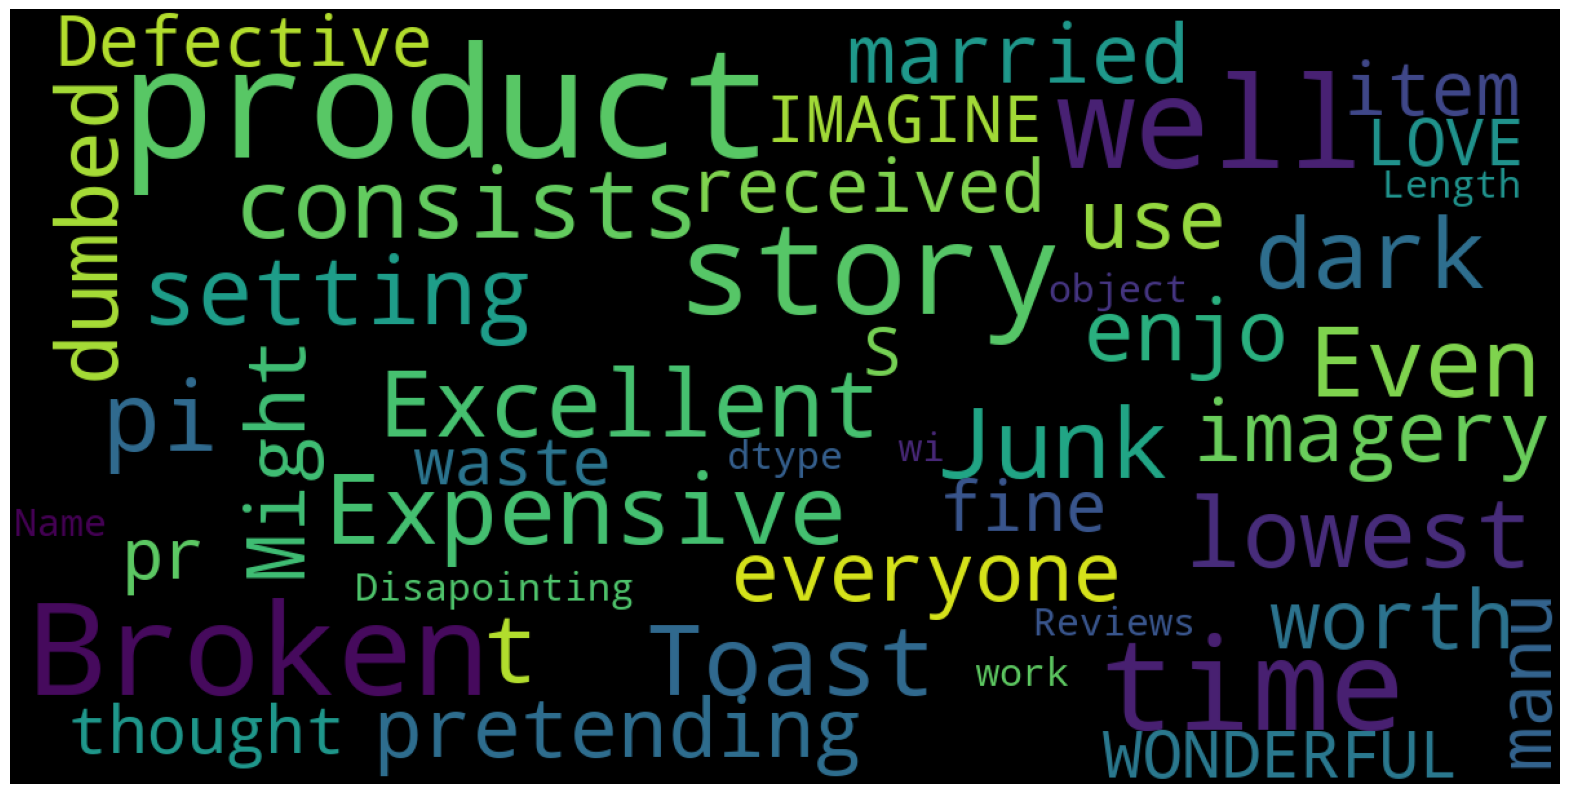

In [ ]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 100,
        max_font_size = 40,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["Reviews"])


<ipython-input-13-2610b87bac0d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
<ipython-input-13-2610b87bac0d>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)


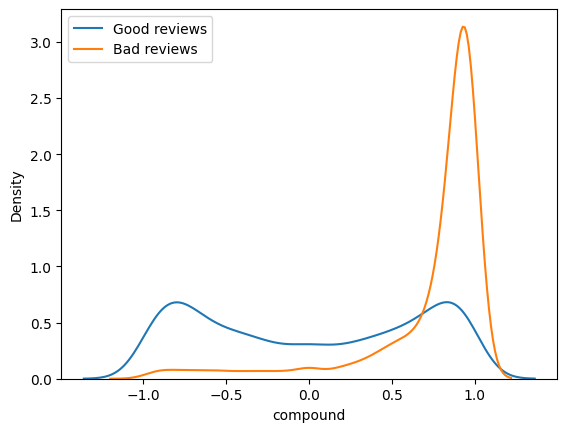

In [ ]:
for x in [0, 1]:
    subset = df[df['Rating'] == x]

    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)
plt.legend()

In [ ]:
# feature selection
label = "Rating"
ignore_cols = [label, "Reviews", "review_clean"]
features = [c for c in df.columns if c not in ignore_cols]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size = 0.20, random_state = 42)

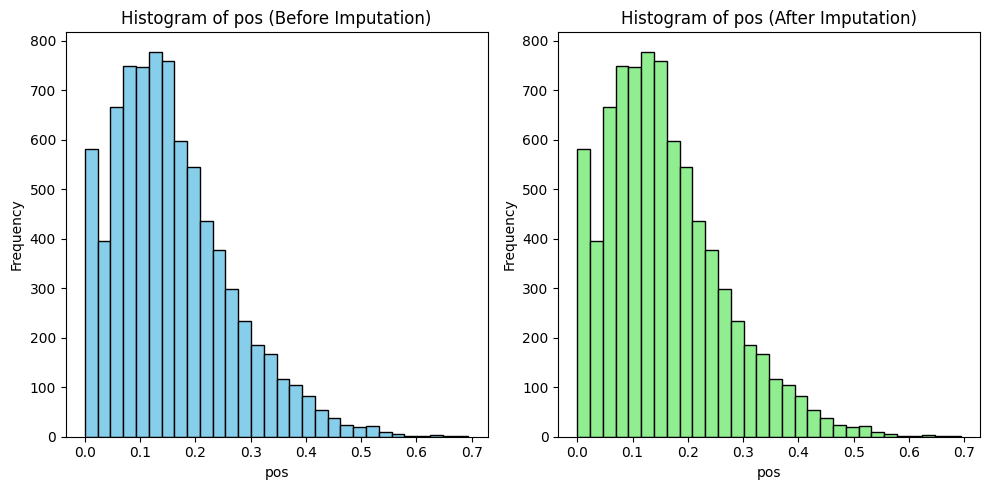

Accuracy of Logistic Regression Model: 86.15%


In [ ]:
import matplotlib.pyplot as plt

# Select a feature for visualization (replace 'feature_name' with the actual feature name)
feature_name = 'pos'

# Plot histogram of the feature before imputation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(X_train[feature_name], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ' + feature_name + ' (Before Imputation)')
plt.xlabel(feature_name)
plt.ylabel('Frequency')

# Plot histogram of the feature after imputation
plt.subplot(1, 2, 2)
plt.hist(X_train_imputed[:, X_train.columns.get_loc(feature_name)], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of ' + feature_name + ' (After Imputation)')
plt.xlabel(feature_name)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
from sklearn.impute import SimpleImputer

# Define the imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, you can fit the Logistic Regression model on the imputed data
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_imputed, y_train)

# Make predictions on the testing data
lr_preds = lr.predict(X_test_imputed)

# Evaluate the accuracy of the model
lr_accuracy = accuracy_score(y_test, lr_preds) * 100
print(f"Accuracy of Logistic Regression Model: {lr_accuracy:.2f}%")


In [ ]:
X_train.isnull().sum()
X_test.isnull().sum()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Check for NaNs after imputation
print(pd.DataFrame(X_train_imputed).isnull().sum())
print(pd.DataFrame(X_test_imputed).isnull().sum())
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Define and initialize the LinearSVC model
svm = LinearSVC()

# Fit the model on the imputed data
svm.fit(X_train_imputed, y_train)

# Predict the ratings for the test set
svm_preds = svm.predict(X_test_imputed)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(y_test, svm_preds) * 100
print(f"Accuracy of SVM Model: {svm_accuracy:.2f}%")


0       0
1       0
2       0
3       0
4       0
       ..
4506    0
4507    0
4508    0
4509    0
4510    0
Length: 4511, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
4506    0
4507    0
4508    0
4509    0
4510    0
Length: 4511, dtype: int64
Accuracy of SVM Model: 85.50%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
X_train.isnull().sum()
X_test.isnull().sum()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Check for NaNs after imputation
print(pd.DataFrame(X_train_imputed).isnull().sum())
print(pd.DataFrame(X_test_imputed).isnull().sum())
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define and initialize the RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the imputed data
rf.fit(X_train_imputed, y_train)

# Make predictions on the test data
rf_preds = rf.predict(X_test_imputed)

# Calculate the accuracy of the model
rf_accuracy = accuracy_score(y_test, rf_preds) * 100
print(f"Accuracy of RFC Model: {rf_accuracy:.2f}%")


0       0
1       0
2       0
3       0
4       0
       ..
4506    0
4507    0
4508    0
4509    0
4510    0
Length: 4511, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
4506    0
4507    0
4508    0
4509    0
4510    0
Length: 4511, dtype: int64
Accuracy of RFC Model: 84.25%


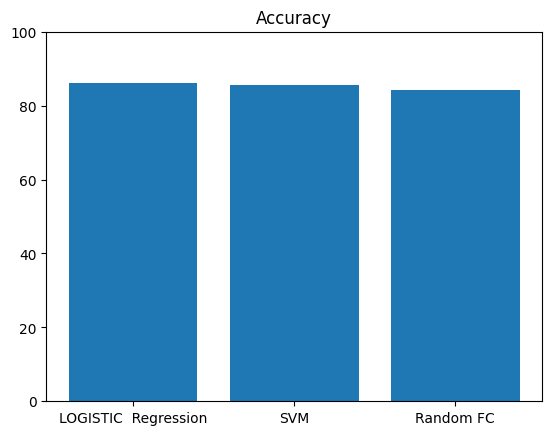

In [ ]:
models = ['LOGISTIC  Regression', 'SVM', 'Random FC']
accuracy = [lr_accuracy, svm_accuracy, rf_accuracy]

plt.bar(models, accuracy)
plt.title('Accuracy')
plt.ylim(0, 100)
plt.show()

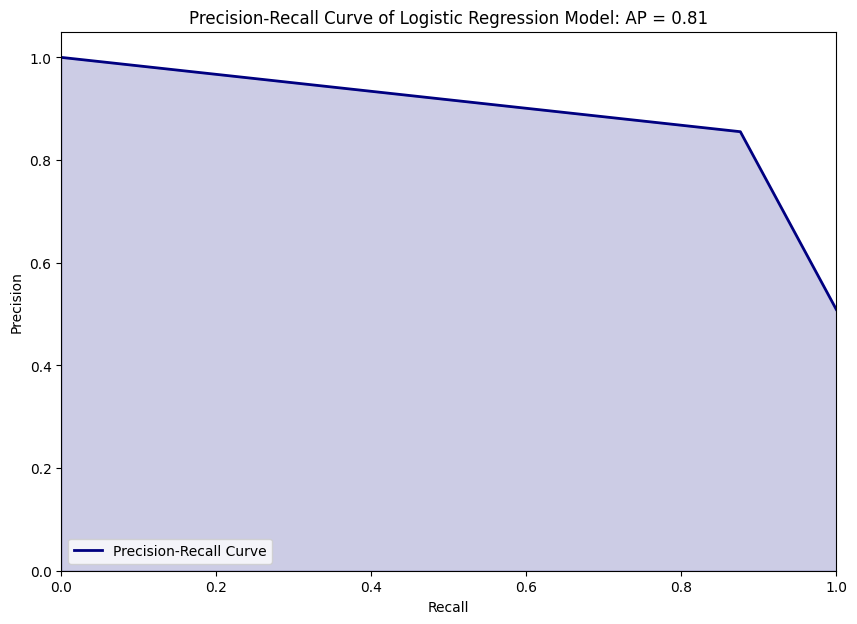

In [ ]:
lr_average_precision = average_precision_score(y_test, lr_preds)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_preds)

plt.figure(figsize=(10, 7))
plt.plot(lr_recall, lr_precision, lw=2, color='navy', label='Precision-Recall Curve')
plt.fill_between(lr_recall, lr_precision, alpha=0.2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve of Logistic Regression Model: AP = {0:0.2f}'.format(lr_average_precision))
plt.legend(loc="lower left")
plt.show()

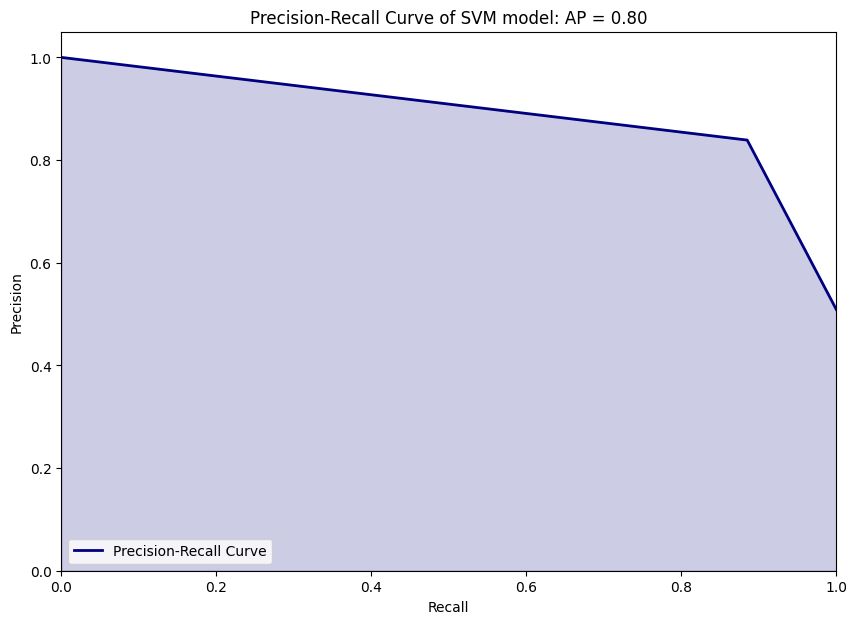

In [ ]:
svm_average_precision = average_precision_score(y_test, svm_preds)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, svm_preds)

plt.figure(figsize=(10, 7))
plt.plot(svm_recall, svm_precision, lw=2, color='navy', label='Precision-Recall Curve')
plt.fill_between(svm_recall, svm_precision, alpha=0.2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve of SVM model: AP = {0:0.2f}'.format(svm_average_precision))
plt.legend(loc="lower left")
plt.show()

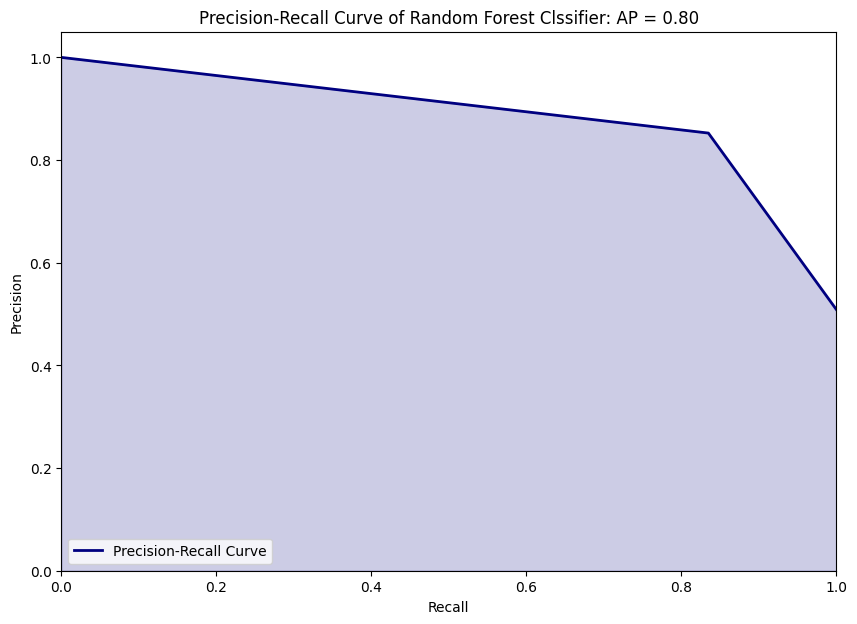

In [ ]:
# PR curve for Random Forest CLassifier
rf_average_precision = average_precision_score(y_test, rf_preds)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_preds)

plt.figure(figsize=(10, 7))
plt.plot(rf_recall, rf_precision, lw=2, color='navy', label='Precision-Recall Curve')
plt.fill_between(rf_recall, rf_precision, alpha=0.2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve of Random Forest Clssifier: AP = {0:0.2f}'.format(rf_average_precision))
plt.legend(loc="lower left")
plt.show()

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       982
           1       0.86      0.88      0.87      1018

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



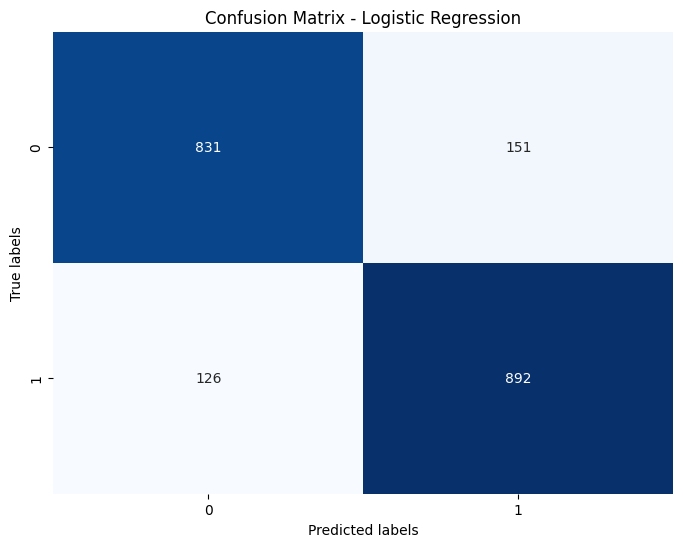

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       982
           1       0.84      0.89      0.86      1018

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



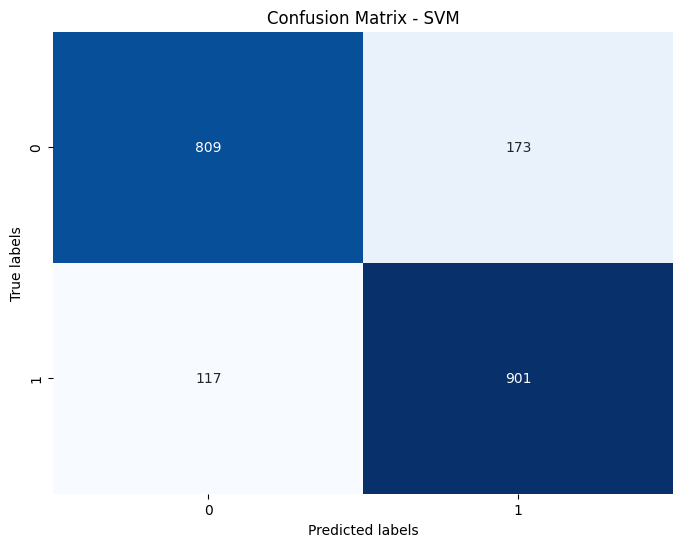

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       982
           1       0.85      0.83      0.84      1018

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



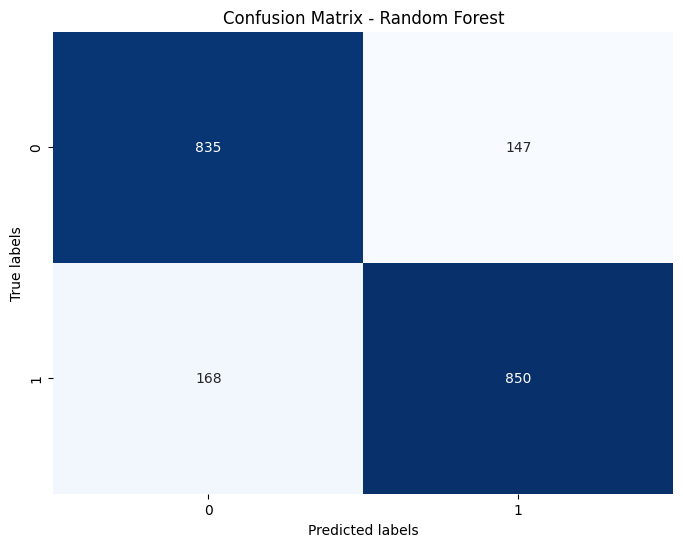

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Print and plot classification report for Logistic Regression
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_preds))
plot_confusion_matrix(y_test, lr_preds, title="Confusion Matrix - Logistic Regression")

# Print and plot classification report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, svm_preds))
plot_confusion_matrix(y_test, svm_preds, title="Confusion Matrix - SVM")

# Print and plot classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_preds))
plot_confusion_matrix(y_test, rf_preds, title="Confusion Matrix - Random Forest")
